In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from collections import defaultdict
from wordcloud import WordCloud
import pandas as pd
import plotly.figure_factory as ff
from src.model import apriori
import plotly.plotly as py

# Exploratory Data Analysis - Metadata

# Data Loading

In [3]:
import sys
project_path = "/media/sarthak/HDD/TUM/courses/sem 3/practical DM/Amazon-Mining"
# make sure to use position 1
sys.path.insert(1, project_path)

In [5]:
from src.data.json_loader import JSONLoader

In [6]:
# file_path corresponds to the file of the .gz file which contains the JSON file. 
file_path = '/media/sarthak/HDD/TUM/courses/sem 3/practical DM/datasets/meta_Electronics.json.gz'
loader = JSONLoader()

In [7]:
df_metadata = loader.load_data(file_path)

In [8]:
df_metadata.loc[0].asin

'0132793040'

# Exploration

In [11]:
table_df = ff.create_table(df_metadata.head())
url_df = py.plot(table_df, filename='df-for-dashboard', auto_open=False)
py.iplot(table_df, filename='df-for-dashboard')

/home/sarthak/anaconda3/lib/python3.6/site-packages/plotly/tools.py:1341: UserWarning:

Looks like you used a newline character: '\n'.

Plotly uses a subset of HTML escape characters
to do things like newline (<br>), bold (<b></b>),
italics (<i></i>), etc. Your newline characters 
have been converted to '<br>' so they will show 
up right on your Plotly figure!



In [12]:
url_df

'https://plot.ly/~sarthak.gupta/26'

In [13]:
df_metadata.head()

,asin,imUrl,description,categories,title,price,salesRank,related,brand
0,0132793040,http://ecx.images-amazon.com/images/I/31JIPhp%...,The Kelby Training DVD Mastering Blend Modes i...,"[[Electronics, Computers & Accessories, Cables...",Kelby Training DVD: Mastering Blend Modes in A...,NaN,NaN,NaN,NaN
1,0321732944,http://ecx.images-amazon.com/images/I/31uogm6Y...,NaN,"[[Electronics, Computers & Accessories, Cables...",Kelby Training DVD: Adobe Photoshop CS5 Crash ...,NaN,NaN,NaN,NaN
2,0439886341,http://ecx.images-amazon.com/images/I/51k0qa8f...,Digital Organizer and Messenger,"[[Electronics, Computers & Accessories, PDAs, ...",Digital Organizer and Messenger,8.15,{'Electronics': 144944},"{'also_viewed': ['0545016266', 'B009ECM8QY', '...",NaN
3,0511189877,http://ecx.images-amazon.com/images/I/41HaAhbv...,The CLIKR-5 UR5U-8780L remote control is desig...,"[[Electronics, Accessories & Supplies, Audio &...",CLIKR-5 Time Warner Cable Remote Control UR5U-...,23.36,NaN,"{'also_viewed': ['B001KC08A4', 'B00KUL8O0W', '...",NaN
4,0528881469,http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN


In [14]:
df_metadata.tail()

,asin,imUrl,description,categories,title,price,salesRank,related,brand
498191,BT008V9J9U,http://ecx.images-amazon.com/images/I/313e6SJm...,Vehicle suction cup mount (replacement) NOTICE...,"[[Electronics, GPS & Navigation, GPS System Ac...",Suction Cup Mount,21.99,NaN,{'buy_after_viewing': ['B000EPFCC2']},Garmin
498192,BT008SXQ4C,http://ecx.images-amazon.com/images/I/31oF9oNv...,Quatech - 1 Port PCMCIA to DB-25 Parallel Adap...,"[[Electronics, Computers & Accessories, Cables...",Parallel PCMCIA Card 1PORT Epp,23.99,NaN,"{'also_bought': ['B000SR2H4W', 'B001Q7X0W6'], ...",NaN
498193,BT008G3W52,http://ecx.images-amazon.com/images/I/21WIrX5f...,C2G - 5m Ultma USB 2.0 A Mini B Cble,"[[Electronics, Computers & Accessories, Cables...",C2G / Cables to Go 5M Ultima USB 2.0 Cable,18.91,NaN,"{'bought_together': ['B0002D6QJO'], 'buy_after...",C2G
498194,BT008UKTMW,http://ecx.images-amazon.com/images/I/41TNAVmf...,Keyboard drawer.,"[[Electronics, Computers & Accessories, Cables...",Underdesk Keyboard Drawer,25.54,NaN,"{'also_viewed': ['B0002LD0ZY', 'B0002LCZP0', '...",Fellowes
498195,BT008T2BGK,http://ecx.images-amazon.com/images/I/41x-15rR...,Garmin USB to R232 Converter CableUSB to RS232...,"[[Electronics, Computers & Accessories, Cables...",USB To R232 Converter Cable,62.31,NaN,"{'also_viewed': ['B0007T27H8', 'B00425S1H8', '...",Garmin


In [15]:
df_metadata.shape

(498196, 9)

In [16]:
dtypes = df_metadata.dtypes

In [17]:
dtypes_df = pd.DataFrame({'feature':dtypes.index, 'type':dtypes.values})

In [18]:
dtypes_df

,feature,type
0,asin,object
1,imUrl,object
2,description,object
3,categories,object
4,title,object
5,price,float64
6,salesRank,object
7,related,object
8,brand,object


In [255]:
table_dtypes = ff.create_table(dtypes_df)
url_dtypes = py.plot(table_dtypes, filename='dtypes-for-dashboard', auto_open=False)
py.iplot(table_dtypes, filename='dtypes-for-dashboard')

In [19]:
nans = df_metadata.isnull().sum()

In [20]:
nans_df = pd.DataFrame({'feature':nans.index, 'Number of NaNs':nans.values})

In [21]:
nans_df = nans_df[nans_df.columns[::-1]]

In [22]:
nans_df

,feature,Number of NaNs
0,asin,0
1,imUrl,175
2,description,38726
3,categories,0
4,title,7002
5,price,108503
6,salesRank,369490
7,related,131237
8,brand,355664


In [262]:
table_nans = ff.create_table(nans_df)
url_nans = py.plot(table_nans, filename='nans-for-dashboard', auto_open=False)
py.iplot(table_nans, filename='nans-for-dashboard')

In [23]:
analysis_df = dtypes_df.merge(nans_df, on='feature')

In [24]:
analysis_df

,feature,type,Number of NaNs
0,asin,object,0
1,imUrl,object,175
2,description,object,38726
3,categories,object,0
4,title,object,7002
5,price,float64,108503
6,salesRank,object,369490
7,related,object,131237
8,brand,object,355664


In [272]:
table_analysis = ff.create_table(analysis_df)
url_analysis = py.plot(table_analysis, filename='analysis-for-dashboard', auto_open=False)
py.iplot(table_analysis, filename='analysis-for-dashboard')

In [25]:
print('dtypes: ', url_dtypes)
print('nans: ', url_nans)
print('analysis: ', url_analysis)

NameError: name 'url_dtypes' is not defined

# univariate analysis

## Feature - Categories

In [172]:
# number of records
len(df_metadata.categories)

498196

### Statistics

Following questions are answered:
1. How many unique categories are there?
2. How many products are there in each category?
3. What is the top and lowest category (in terms of number of products associated)
4. On an average, how many categories a product belong to. Also find max and min of categories for a product. 

In [173]:
# how many categories and how many in each category - draw a bar chart
category_product = defaultdict(list)
for idx, categories in enumerate(df_metadata.categories):
    for cat in categories[0]:
        category_product[cat].append(df_metadata.loc[idx].asin)

In [175]:
print('number of categories: ', len(category_product))

number of categories:  833


In [176]:
list(category_product.keys())

['Electronics',
 'Computers & Accessories',
 'Cables & Accessories',
 'Monitor Accessories',
 'PDAs, Handhelds & Accessories',
 'PDAs & Handhelds',
 'Accessories & Supplies',
 'Audio & Video Accessories',
 'Remote Controls',
 'TV Remote Controls',
 'GPS & Navigation',
 'Vehicle GPS',
 'Trucking GPS',
 'Headphones',
 'eBook Readers & Accessories',
 'Power Adapters',
 'Skins',
 'Covers',
 'Touch Screen Tablet Accessories',
 'Bundles',
 'Chargers & Adapters',
 'eBook Readers',
 'Screen Protectors',
 'PDA & Handheld Accessories',
 'Laptop & Netbook Computer Accessories',
 'Docking Stations',
 'Car & Vehicle Electronics',
 'Car Electronics',
 'Car Audio',
 'Car Stereo Receivers',
 'Computer Components',
 'Blank Media',
 'CD-R Discs',
 'Sports & Handheld GPS',
 'Handheld GPS Units',
 'Camera & Photo',
 'Accessories',
 'Telescope & Microscope Accessories',
 'Telescope Accessories',
 'Cables & Interconnects',
 'Audio Cables',
 'Speaker Cables',
 'Cleaning & Repair',
 'Lens Cleaners',
 'TV Acce

In [177]:
number_of_products_per_category = []
for cat in category_product.keys():
    number_of_products_per_category.append(len(category_product[cat]))

In [178]:
print('number of products in each category: ', number_of_products_per_category)

number of products in each category:  [495559, 232223, 52155, 1365, 3085, 372, 67322, 52256, 3851, 2866, 7066, 605, 248, 11577, 6582, 831, 1123, 3896, 42177, 2992, 16763, 237, 6340, 2628, 56210, 1516, 25887, 15303, 9751, 1560, 27004, 2375, 566, 1212, 764, 94752, 45152, 949, 922, 25735, 5080, 1249, 1316, 271, 3888, 3539, 222, 26926, 9059, 5184, 4401, 4293, 34796, 26880, 22788, 40575, 29774, 30005, 2652, 1339, 6845, 4011, 3267, 4872, 2648, 1779, 5291, 1756, 1103, 11412, 560, 491, 2496, 199, 1944, 2251, 840, 565, 7590, 5845, 981, 809, 3798, 2431, 452, 3748, 4294, 530, 3829, 13004, 5405, 3909, 3274, 940, 6839, 4649, 197, 1537, 1649, 1113, 2852, 2425, 321, 1217, 9788, 755, 1508, 15670, 6647, 778, 5444, 3693, 579, 8607, 4481, 255, 2847, 282, 179, 2162, 2162, 6994, 8827, 4479, 63, 1001, 2663, 816, 1434, 300, 725, 7719, 3003, 1904, 824, 91, 1899, 1544, 1229, 8374, 206, 1233, 3892, 2003, 734, 568, 1184, 2294, 4579, 2227, 2518, 1666, 888, 1863, 1012, 432, 1137, 828, 148, 141, 261, 459, 4029, 106

In [179]:
density, category = (list(t) for t in zip(*sorted(zip(number_of_products_per_category, list(category_product.keys())))))

In [181]:
tupled = dict(zip(category, density))
listed = list(zip(category, density))
cat_freq = [list(elem) for elem in listed]
cat_freq = cat_freq[::-1]

In [182]:
cloud = WordCloud(width=700, height=500)
c = cloud.generate_from_frequencies(tupled)

In [190]:
c.to_file("category_cloud.png")

In [191]:
headers=['Categories', 'Products']
cat_freq_df = pd.DataFrame(cat_freq[:10], columns=headers)

In [192]:
table = ff.create_table(cat_freq_df)
url_cat_freq = py.plot(table, filename='cat_freq-for-dashboard', auto_open=False)
py.iplot(table, filename='cat_freq-for-dashboard')

In [193]:
url_cat_freq

'https://plot.ly/~sarthak.gupta/22'

In [149]:
print('table is available at: ', url_cat_freq)

table is available at:  https://plot.ly/~sarthak.gupta/22


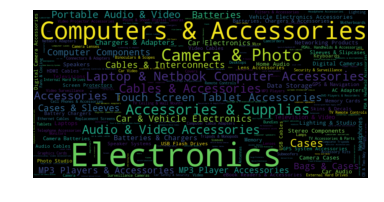

In [152]:
plt.figure()
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Feature - description

Questions answered:
1. What is the average description length?

In [37]:
words = []
for desc in df_metadata.description:
    if pd.notnull(desc):
        words.append(len(desc.split()))

In [38]:
words

[106,
 4,
 274,
 663,
 31,
 76,
 16,
 71,
 12,
 168,
 6,
 83,
 9,
 48,
 16,
 72,
 97,
 16,
 96,
 59,
 142,
 299,
 55,
 19,
 62,
 171,
 248,
 221,
 6,
 64,
 132,
 110,
 114,
 40,
 51,
 52,
 39,
 106,
 8,
 31,
 9,
 111,
 122,
 103,
 324,
 313,
 101,
 89,
 121,
 2,
 87,
 137,
 92,
 314,
 12,
 52,
 73,
 109,
 289,
 3,
 289,
 239,
 112,
 126,
 0,
 272,
 148,
 164,
 68,
 76,
 98,
 59,
 76,
 45,
 87,
 32,
 84,
 29,
 75,
 48,
 78,
 90,
 152,
 121,
 37,
 169,
 103,
 80,
 74,
 54,
 120,
 12,
 90,
 26,
 65,
 95,
 39,
 68,
 60,
 11,
 21,
 88,
 60,
 15,
 65,
 5,
 23,
 45,
 138,
 5,
 18,
 62,
 206,
 148,
 151,
 82,
 64,
 85,
 15,
 12,
 219,
 214,
 97,
 91,
 135,
 100,
 150,
 58,
 130,
 54,
 148,
 5,
 136,
 218,
 77,
 279,
 167,
 275,
 271,
 280,
 287,
 287,
 155,
 143,
 226,
 259,
 259,
 10,
 287,
 155,
 293,
 167,
 189,
 224,
 263,
 87,
 150,
 185,
 185,
 278,
 201,
 239,
 152,
 37,
 36,
 38,
 31,
 31,
 8,
 29,
 60,
 31,
 19,
 4,
 79,
 67,
 44,
 120,
 16,
 68,
 110,
 84,
 48,
 53,
 73,
 48,
 16,
 1

In [92]:
import numpy as np
import plotly.graph_objs as go

In [69]:
a, b = np.histogram(words, bins=1000)

In [99]:
data = [go.Histogram(x=words,
                    histfunc='count',
                    autobinx=True)]
url_word_freq = py.plot(data, filename='word_freq-for-dashboard', auto_open=False)
py.iplot(data, filename='basic histogram')

/home/sarthak/anaconda3/lib/python3.6/site-packages/plotly/plotly/plotly.py:224: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.



In [100]:
print('word freq: ', url_word_freq)

word freq:  https://plot.ly/~sarthak.gupta/42


## Feature - Related

Questions answered:
1. What all type of relations are available?

In [125]:
df_metadata.loc[0, 'asin']

'0132793040'

In [126]:
relations = []
for idx, related in enumerate(df_metadata.related):
    if pd.notnull(related):
        for key in related.keys():
            if key not in relations:
                relations.append(key)

In [127]:
relations

['also_viewed', 'buy_after_viewing', 'also_bought', 'bought_together']

In [130]:
df_metadata[relations[0]] = 0
df_metadata[relations[1]] = 0
df_metadata[relations[2]] = 0
df_metadata[relations[3]] = 0

### Frequent Itemset Mining

Following questions are answered:
1. If a product belongs to category X, how likely is it that it also belongs to category Y?

In [220]:
categories_for_apriori = []
for idx, category_lol in enumerate(df_metadata.categories):
    categories_for_apriori.append([item for sublist in df_metadata.categories[idx] for item in sublist])

In [223]:
C1 = apriori.createC1(categories_for_apriori)
D = list(map(set,categories_for_apriori))

[frozenset({'12-Month Financing'}),
 frozenset({'3D Glasses'}),
 frozenset({'AC Adapters'}),
 frozenset({'APS Cameras'}),
 frozenset({'AV Receivers & Amplifiers'})]

In [228]:
L,suppData = apriori.apriori(categories_for_apriori, minSupport=0.2)

In [229]:
L

[[frozenset({'Electronics'}), frozenset({'Computers & Accessories'})],
 [frozenset({'Computers & Accessories', 'Electronics'})],
 []]

In [233]:
suppData

{frozenset({'Cables & Accessories'}): 0.10505704582132333,
 frozenset({'Computers & Accessories'}): 0.46906036981428995,
 frozenset({'Electronics'}): 1.0,
 frozenset({'Monitor Accessories'}): 0.0027499217175569455,
 frozenset({'PDAs & Handhelds'}): 0.0007547230407309573,
 frozenset({'PDAs, Handhelds & Accessories'}): 0.006399087909176308,
 frozenset({'Accessories & Supplies'}): 0.13654465310841515,
 frozenset({'Audio & Video Accessories'}): 0.10549663184770652,
 frozenset({'Remote Controls'}): 0.007731896683233105,
 frozenset({'TV Remote Controls'}): 0.005752755943443945,
 frozenset({'GPS & Navigation'}): 0.014207259793334351,
 frozenset({'Trucking GPS'}): 0.0005018105324009024,
 frozenset({'Vehicle GPS'}): 0.0012224104569285984,
 frozenset({'Headphones'}): 0.02339239977840047,
 frozenset({'Power Adapters'}): 0.0017101702944222756,
 frozenset({'eBook Readers & Accessories'}): 0.015032236308601434,
 frozenset({'Skins'}): 0.002932580751350874,
 frozenset({'Covers'}): 0.008849930549422316

In [40]:
# average number of categories a product belong to?